## Bivariate Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data

In [2]:
automobile_data = pd.read_csv('datasets/auto-mpg.csv')

automobile_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
automobile_data.shape

(398, 9)

In [4]:
automobile_data = automobile_data.replace('?', np.nan)

automobile_data = automobile_data.dropna()

In [5]:
automobile_data.shape

(392, 9)

In [6]:
automobile_data.drop(['origin', 'car name'], axis=1, inplace=True)

automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [8]:
automobile_data['model year'] = '19' + automobile_data['model year'].astype(str)

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
131,32.0,4,71.0,65,1836,21.0,191974
283,20.2,6,232.0,90,3265,18.2,191979
307,26.8,6,173.0,115,2700,12.9,191979
168,23.0,4,140.0,83,2639,17.0,191975
45,18.0,6,258.0,110,2962,13.5,191971


In [9]:
import datetime

automobile_data['age'] = datetime.datetime.now().year - \
    pd.to_numeric(automobile_data['model year'])

In [11]:
automobile_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,191970,-189944
1,15.0,8,350.0,165,3693,11.5,191970,-189944
2,18.0,8,318.0,150,3436,11.0,191970,-189944
3,16.0,8,304.0,150,3433,12.0,191970,-189944
4,17.0,8,302.0,140,3449,10.5,191970,-189944


In [12]:
automobile_data.drop(['model year'], axis=1, inplace=True)

automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
226,20.5,6,231.0,105,3425,16.9,-189951
323,27.9,4,156.0,105,2800,14.4,-189954
67,11.0,8,429.0,208,4633,11.0,-189946
211,16.5,6,168.0,120,3820,16.7,-189950
198,33.0,4,91.0,53,1795,17.4,-189950


In [13]:
automobile_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [14]:
automobile_data['horsepower'] = pd.to_numeric(automobile_data['horsepower'], errors='coerce')

automobile_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,-189949.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,-189956.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,-189953.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,-189950.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,-189947.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,-189944.000000


In [15]:
automobile_data.to_csv('datasets/automobile_data_processed.csv', index=False)

In [17]:
!ls datasets\

500_Person_Gender_Height_Weight_Index.csv
HousingData.csv
Mall_Customers.json
Salary_Data.csv
auto-mpg.csv
automobile_data_processed.csv
house_data_processed.csv
mall_data_column_oriented.json
mall_data_index_oriented.json
mall_data_processed.csv
mall_data_records_oriented.json
mall_data_values_oriented.json
sp500_1987.csv
weight-height.csv


### Bivariate data analysis

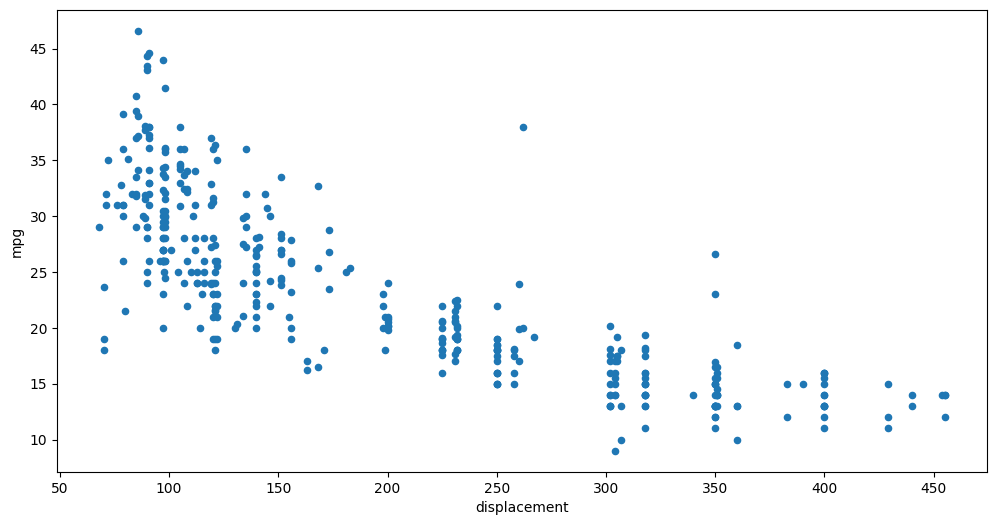

In [21]:
automobile_data.plot.scatter(x='displacement', y='mpg', figsize=(12, 6))

plt.show()

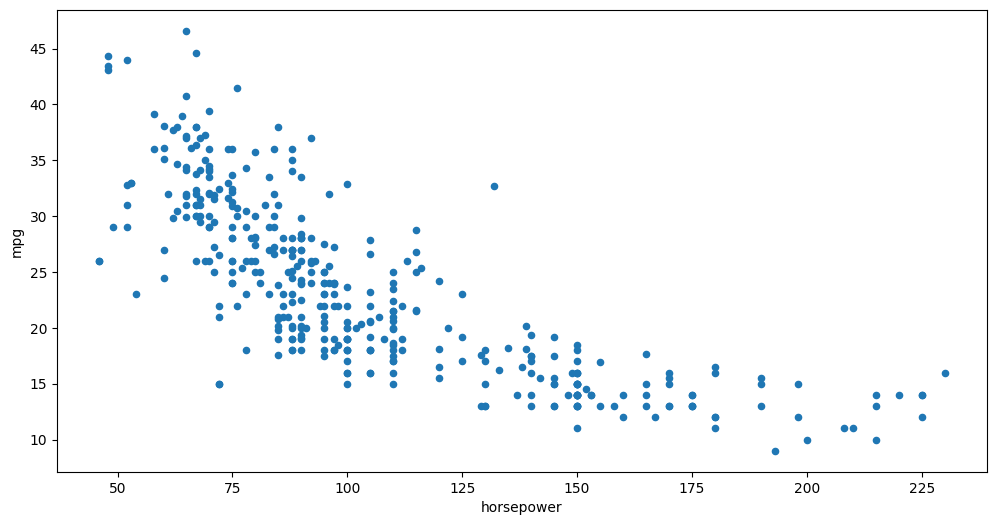

In [23]:
automobile_data.plot.scatter(x='horsepower', y='mpg', figsize=(12, 6))

plt.show()

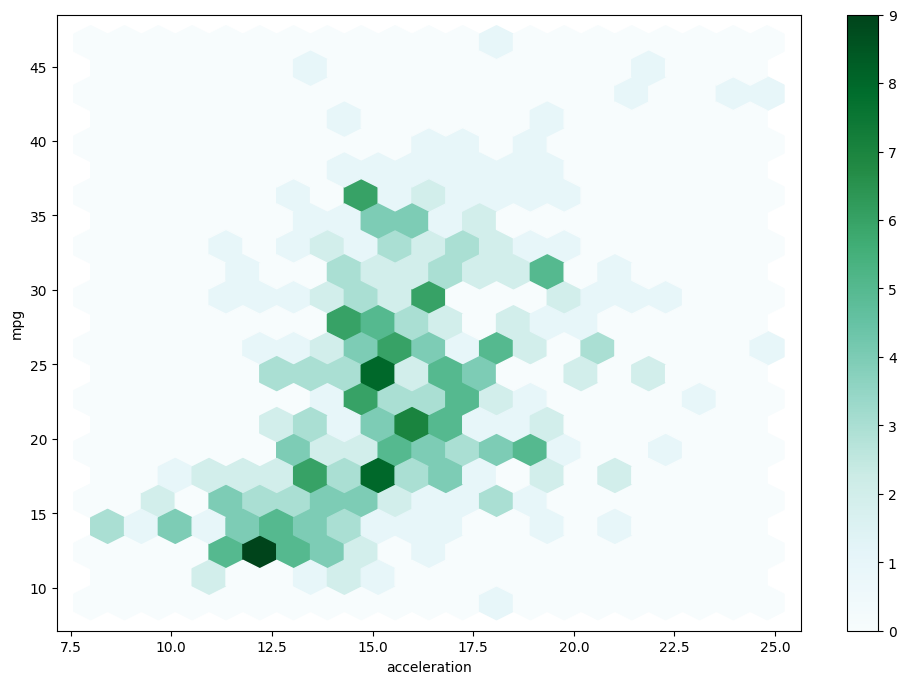

In [25]:
automobile_data.plot.hexbin(x='acceleration', y='mpg', gridsize=20, figsize=(12, 8))

plt.show()

In [26]:
automobile_grouped = automobile_data.groupby(['cylinders']).mean()[['mpg', 'horsepower', 
                                                                    'acceleration', 'displacement']]

automobile_grouped

,mpg,horsepower,acceleration,displacement
cylinders,,,,
3,20.550000,99.250000,13.250000,72.500000
4,29.283920,78.281407,16.581910,109.670854
5,27.366667,82.333333,18.633333,145.000000
6,19.973494,101.506024,16.254217,218.361446
8,14.963107,158.300971,12.955340,345.009709


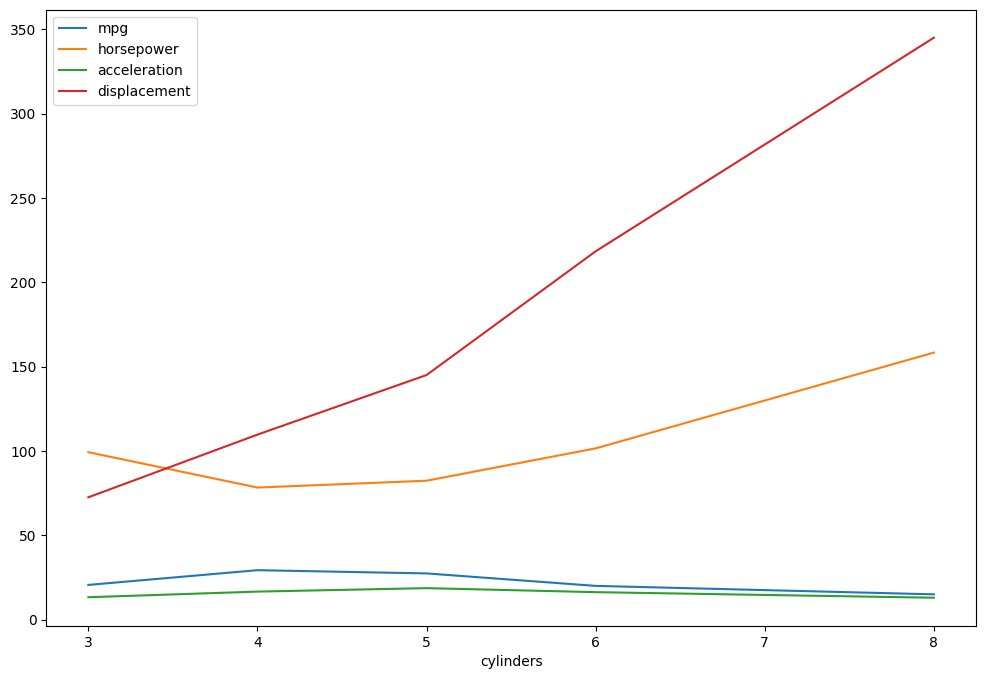

In [27]:
automobile_grouped.plot.line(figsize=(12, 8))

plt.show()

### Multivariate data analysis

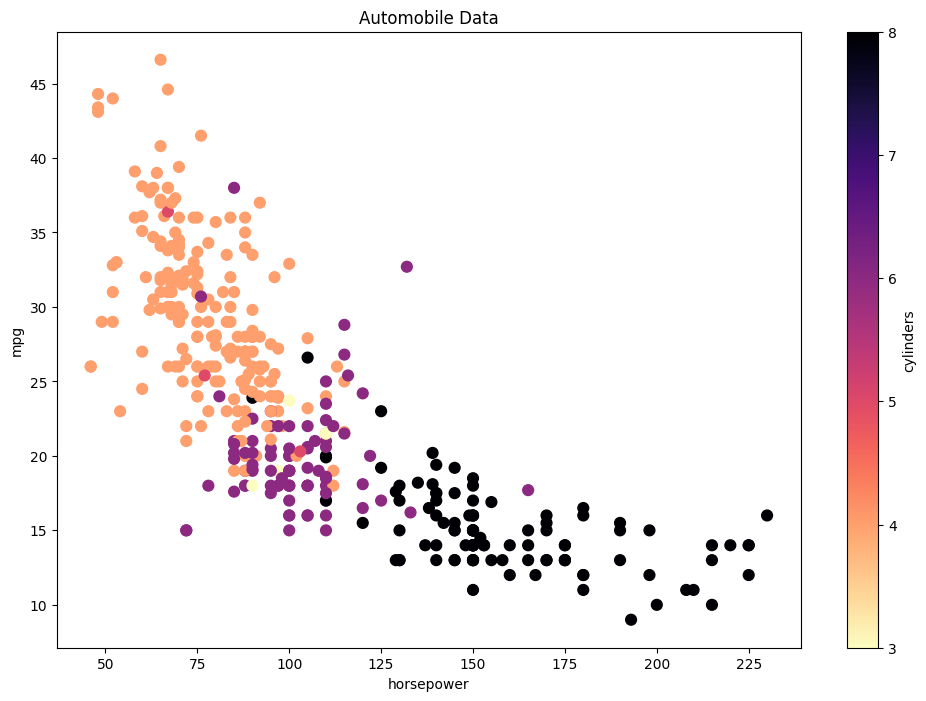

In [28]:
fig, ax = plt.subplots()

automobile_data.plot(x='horsepower', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='magma_r', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

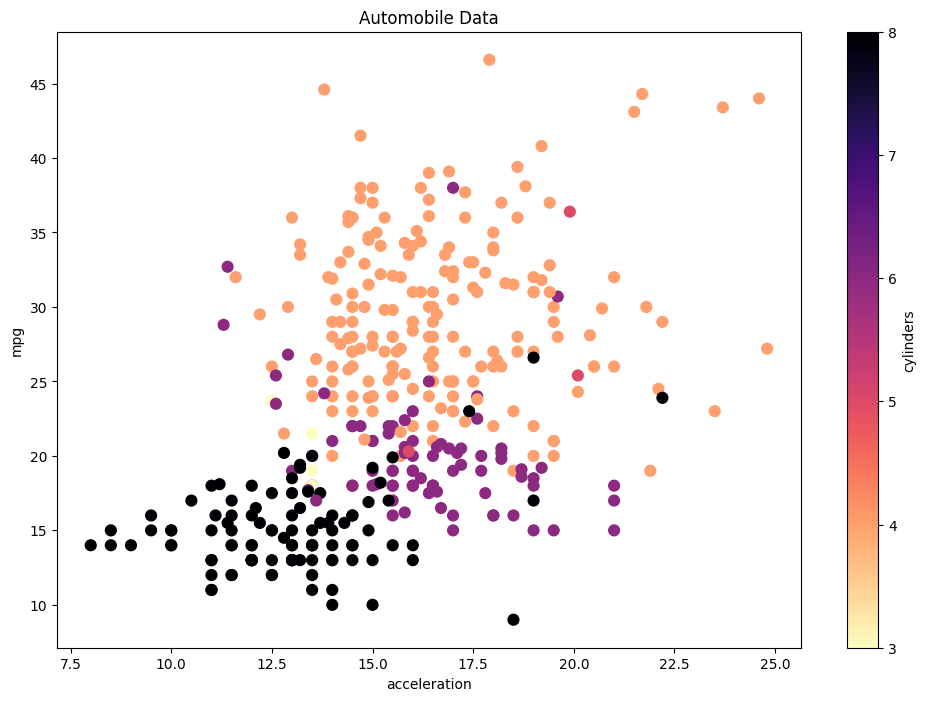

In [29]:
fig, ax = plt.subplots()

automobile_data.plot(x='acceleration', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='magma_r', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

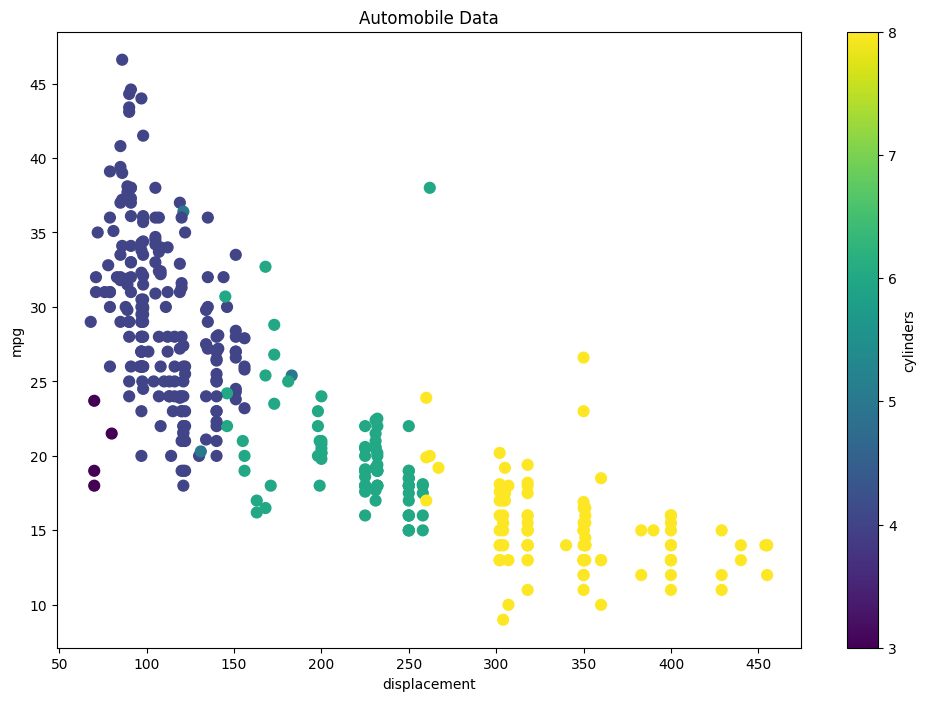

In [30]:
fig, ax = plt.subplots()

automobile_data.plot(x='displacement', y='mpg', 
                     kind='scatter', s=60, c='cylinders', 
                     cmap='viridis', title='Automobile Data', 
                     figsize=(12, 8), ax=ax)

plt.show()

In [31]:
automobile_data['acceleration'].cov(automobile_data['mpg'])

np.float64(9.11551437966491)

In [32]:
automobile_data['acceleration'].corr(automobile_data['mpg'])

np.float64(0.4233285369027873)

In [33]:
automobile_data['horsepower'].cov(automobile_data['mpg'])

np.float64(-233.85792577900722)

In [34]:
automobile_data['horsepower'].corr(automobile_data['mpg'])

np.float64(-0.7784267838977759)

In [35]:
automobile_data['horsepower'].cov(automobile_data['displacement'])

np.float64(3614.0337439323557)

In [36]:
automobile_data['horsepower'].corr(automobile_data['displacement'])

np.float64(0.897257001843469)

### Covariance

In [37]:
automobile_data_cov = automobile_data.cov()

automobile_data_cov

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,60.918142,-10.352928,-657.585207,-233.857926,-5517.440704,9.115514,-16.691477
cylinders,-10.352928,2.909696,169.721949,55.348244,1300.424363,-2.375052,2.171930
displacement,-657.585207,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,142.572133
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,59.036432
weight,-5517.440704,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,967.228457
acceleration,9.115514,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,-2.950462
age,-16.691477,2.171930,142.572133,59.036432,967.228457,-2.950462,13.569915


### Correlation

In [40]:
automobile_data_corr = automobile_data.corr()

automobile_data_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

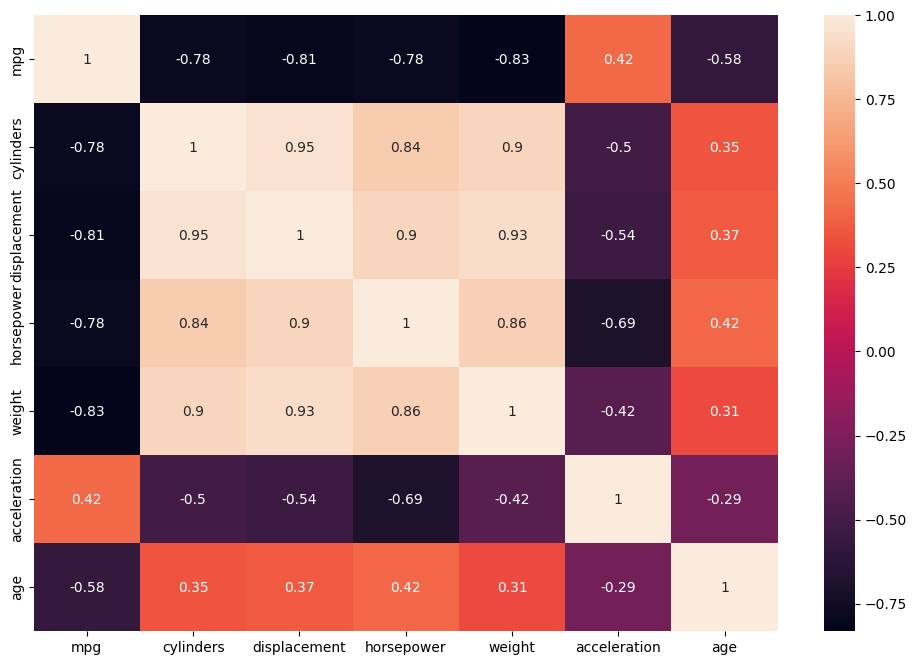

In [43]:
plt.figure(figsize=(12, 8))

sns.heatmap(automobile_data_corr, annot=True)

## Linear Regression

In [44]:
mpg_mean = automobile_data['mpg'].mean()

mpg_mean

np.float64(23.445918367346938)

In [45]:
horsepower_mean = automobile_data['horsepower'].mean()

horsepower_mean

np.float64(104.46938775510205)

#### Calculate the terms needed for the numerator and denominator of beta

In [46]:
automobile_data['horsepower_mpg_cov'] = (automobile_data['horsepower'] - horsepower_mean) * \
                                        (automobile_data['mpg'] - mpg_mean)

automobile_data['horsepower_var'] = (automobile_data['horsepower'] - horsepower_mean)**2

In [47]:
automobile_data['horsepower_mpg_cov']

0      -139.037630
1      -511.236610
2      -247.955998
3      -339.017222
4      -229.027426
          ...     
393     -65.641712
394   -1078.460079
395    -175.096814
396    -115.989671
397    -169.735589
Name: horsepower_mpg_cov, Length: 392, dtype: float64

In [48]:
automobile_data['horsepower_var']

0       651.812162
1      3663.955019
2      2073.036651
3      2073.036651
4      1262.424406
          ...     
393     341.118284
394    2753.036651
395     418.995835
396     648.689713
397     504.873386
Name: horsepower_var, Length: 392, dtype: float64

#### Calculate beta and alpha

In [49]:
beta = automobile_data['horsepower_mpg_cov'].sum() / automobile_data['horsepower_var'].sum()

print(f'beta = {beta}')

beta = -0.15784473335365362


In [50]:
alpha = mpg_mean - (beta * horsepower_mean)

print(f'alpha = {alpha}')

alpha = 39.93586102117047


In [51]:
y_pred = alpha + beta * automobile_data['horsepower']

print(y_pred)

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
393    26.361214
394    31.727935
395    26.676903
396    27.466127
397    26.992593
Name: horsepower, Length: 392, dtype: float64


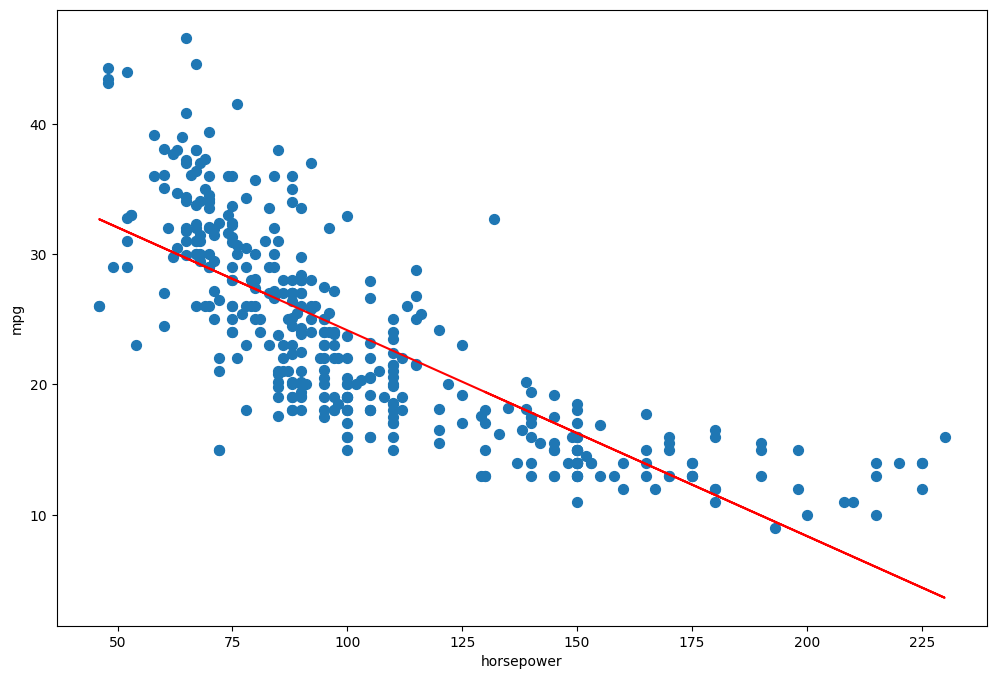

In [53]:
automobile_data.plot(x='horsepower', y='mpg', 
                     kind='scatter', s=50, figsize=(12, 8))

plt.plot(automobile_data['horsepower'], y_pred, color='red')

plt.show()